In [2]:
import xarray as xr

file_envi0 = "/Users/mattolson/data/ASO/CASI/20170220/174008/CASI_2017_02_20_174008_atm_ort"
filename = "/Users/mattolson/data/ASO/CASI/20170220/174008/casi_test.nc"

In [3]:
data = xr.open_dataset(filename)

print(data.dims)
print(data.data_vars)

Frozen(SortedKeysDict({'x': 503, 'y': 2204}))
Data variables:
    transverse_mercator  |S1 ...
    Band1                (y, x) float32 ...
    Band2                (y, x) float32 ...
    Band3                (y, x) float32 ...
    Band4                (y, x) float32 ...
    Band5                (y, x) float32 ...
    Band6                (y, x) float32 ...
    Band7                (y, x) float32 ...
    Band8                (y, x) float32 ...
    Band9                (y, x) float32 ...
    Band10               (y, x) float32 ...
    Band11               (y, x) float32 ...
    Band12               (y, x) float32 ...
    Band13               (y, x) float32 ...
    Band14               (y, x) float32 ...
    Band15               (y, x) float32 ...
    Band16               (y, x) float32 ...
    Band17               (y, x) float32 ...
    Band18               (y, x) float32 ...
    Band19               (y, x) float32 ...
    Band20               (y, x) float32 ...
    Band21               

In [4]:
dat = xr.open_rasterio(file_envi0)
print(dat.shape)

dat2 = dat.to_masked_array(-9999.0)

(72, 2204, 503)


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-9999.0, 140.4566650390625]
    G: [-9999.0, 140.4566650390625]
    B: [-9999.0, 140.4566650390625]

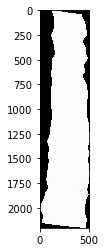

In [13]:
imshow(dat2[29])

### Hello


In [14]:
import spectral.io.envi as envi

file_envi = "/Users/mattolson/data/ASO/CASI/20170220/174008/CASI_2017_02_20_174008_atm_ort.hdr"
img = envi.open(file_envi)
img.shape

(2204, 503, 72)

In [15]:
import numpy as np

# define bands
rgb = [.660, .550, .470]
print(rgb.__class__)
wv = img.bands.centers
# b_diff = np.abs(rgb - wv)
# rgb_idx = np.where(np.min(b_diff))
# rgb_idx
#np.min(np.where(x==2))
wv_nm = min(wv, key=lambda x:abs(x-rgb[0]))

<class 'list'>


In [16]:
# get closest match
v = np.zeros(3, int)
for i, x in enumerate(rgb):
    v[i] = (np.argmin(abs(np.asarray(wv)-x)))
v

array([31, 19, 11])

ImageView object:
  Display bands       :  (31, 19, 11)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-99.98999786376953, 1.4111133813858032]
    G: [-99.98999786376953, 1.3512991666793823]
    B: [-99.98999786376953, 1.2676031589508057]

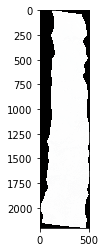

In [17]:
from spectral import *
img2 = img.metadata
imshow(img, tuple(v), vmin = 0)

In [25]:
# doesn't work
# import xarray as xr
# ixr = xr.open_dataset(file_envi)
# ixr

In [20]:
import rasterio
r = rasterio.open(file_envi0)
# imshow(r, tuple(v))
print(r.shape)
arr = r.read()
print(arr.shape)
r.nodatavals
msk = r.read_masks()
msk.shape

(2204, 503)
(72, 2204, 503)


(72, 2204, 503)

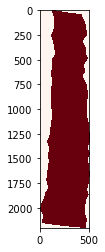

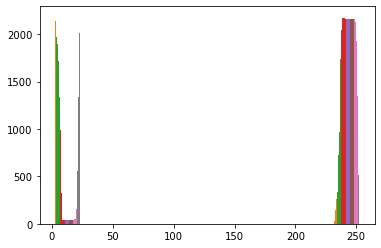

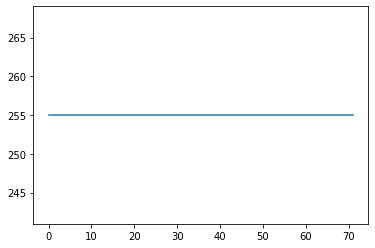

In [23]:
import matplotlib.pyplot as plt
plt.imshow(msk[50], cmap='Reds')
plt.show()

plt.hist(msk[50], bins=10)
plt.show()

In [24]:
len(msk[:,1200,260])


72

In [11]:
from rasterio.plot import show
msk_rgb = msk[np.append(v,30)]
print(msk_rgb.shape)
show(msk_rgb)

NameError: name 'msk' is not defined

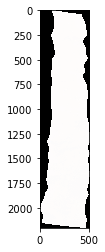

In [12]:
# pr specific band combo
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the file:
raster = r

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((nir_norm, red_norm, green_norm))

# View the color composite
plt.imshow(nrg)
